In [167]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'fizzbuzz'
    elif n % 3 == 0:
        return 'fizz'
    elif n % 5 == 0:
        return 'buzz'
    else:
        return 'other'

## Logic Based FizzBuzz Function [Software 1.0]

## Create Training and Testing Datasets in CSV Format

In [168]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [169]:
def processData(dataset):
    
    # Why do we have to process?
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [170]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [171]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "fizzbuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [172]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 256
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    # Why use Dense layer and then activation?
    # Why use sequential model with layers?
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    
    model.summary()
    
    # Why use categorical_crossentropy?
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [173]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [174]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               2816      
_________________________________________________________________
activation_27 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 1028      
_________________________________________________________________
activation_28 (Activation)   (None, 4)                 0         
Total params: 3,844
Trainable params: 3,844
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [175]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 0s 315us/step - loss: 1.2698 - acc: 0.4569 - val_loss: 1.1709 - val_acc: 0.5167
Epoch 2/10000
720/720 [==============================] - 0s 12us/step - loss: 1.1802 - acc: 0.5236 - val_loss: 1.1469 - val_acc: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 15us/step - loss: 1.1609 - acc: 0.5361 - val_loss: 1.1456 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 19us/step - loss: 1.1536 - acc: 0.5319 - val_loss: 1.1437 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 19us/step - loss: 1.1506 - acc: 0.5306 - val_loss: 1.1436 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 16us/step - loss: 1.1543 - acc: 0.5306 - val_loss: 1.1440 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 17us/step - loss: 1.1512 - acc: 0.5333 - val_loss: 1.1465 - val_acc: 0.5333
E

720/720 [==============================] - 0s 15us/step - loss: 1.0638 - acc: 0.5333 - val_loss: 1.1248 - val_acc: 0.5333
Epoch 61/10000
720/720 [==============================] - 0s 13us/step - loss: 1.0605 - acc: 0.5361 - val_loss: 1.1242 - val_acc: 0.5333
Epoch 62/10000
720/720 [==============================] - 0s 15us/step - loss: 1.0539 - acc: 0.5403 - val_loss: 1.1242 - val_acc: 0.5333
Epoch 63/10000
720/720 [==============================] - 0s 13us/step - loss: 1.0501 - acc: 0.5319 - val_loss: 1.1227 - val_acc: 0.5333
Epoch 64/10000
720/720 [==============================] - 0s 17us/step - loss: 1.0563 - acc: 0.5361 - val_loss: 1.1211 - val_acc: 0.5333
Epoch 65/10000
720/720 [==============================] - 0s 15us/step - loss: 1.0499 - acc: 0.5389 - val_loss: 1.1226 - val_acc: 0.5333
Epoch 66/10000
720/720 [==============================] - 0s 16us/step - loss: 1.0502 - acc: 0.5389 - val_loss: 1.1208 - val_acc: 0.5333
Epoch 67/10000
720/720 [==============================] 

Epoch 120/10000
720/720 [==============================] - 0s 15us/step - loss: 0.9105 - acc: 0.5986 - val_loss: 1.0510 - val_acc: 0.5389
Epoch 121/10000
720/720 [==============================] - 0s 14us/step - loss: 0.9199 - acc: 0.5750 - val_loss: 1.0453 - val_acc: 0.5444
Epoch 122/10000
720/720 [==============================] - 0s 16us/step - loss: 0.9125 - acc: 0.5778 - val_loss: 1.0451 - val_acc: 0.5444
Epoch 123/10000
720/720 [==============================] - 0s 15us/step - loss: 0.8986 - acc: 0.5750 - val_loss: 1.0467 - val_acc: 0.5500
Epoch 124/10000
720/720 [==============================] - 0s 14us/step - loss: 0.9088 - acc: 0.5736 - val_loss: 1.0408 - val_acc: 0.5500
Epoch 125/10000
720/720 [==============================] - 0s 14us/step - loss: 0.8966 - acc: 0.5931 - val_loss: 1.0391 - val_acc: 0.5444
Epoch 126/10000
720/720 [==============================] - 0s 14us/step - loss: 0.8889 - acc: 0.5972 - val_loss: 1.0429 - val_acc: 0.5333
Epoch 127/10000
720/720 [=========

720/720 [==============================] - 0s 14us/step - loss: 0.7752 - acc: 0.6542 - val_loss: 0.9583 - val_acc: 0.6000
Epoch 180/10000
720/720 [==============================] - 0s 15us/step - loss: 0.7868 - acc: 0.6542 - val_loss: 0.9596 - val_acc: 0.6056
Epoch 181/10000
720/720 [==============================] - 0s 15us/step - loss: 0.7974 - acc: 0.6694 - val_loss: 0.9558 - val_acc: 0.5667
Epoch 182/10000
720/720 [==============================] - 0s 14us/step - loss: 0.7778 - acc: 0.6625 - val_loss: 0.9545 - val_acc: 0.5722
Epoch 183/10000
720/720 [==============================] - 0s 16us/step - loss: 0.7638 - acc: 0.6889 - val_loss: 0.9520 - val_acc: 0.5611
Epoch 184/10000
720/720 [==============================] - 0s 14us/step - loss: 0.7749 - acc: 0.6944 - val_loss: 0.9584 - val_acc: 0.5667
Epoch 185/10000
720/720 [==============================] - 0s 15us/step - loss: 0.7696 - acc: 0.6736 - val_loss: 0.9514 - val_acc: 0.5889
Epoch 186/10000
720/720 [=========================

720/720 [==============================] - 0s 15us/step - loss: 0.6827 - acc: 0.7458 - val_loss: 0.8792 - val_acc: 0.6667
Epoch 239/10000
720/720 [==============================] - 0s 13us/step - loss: 0.6651 - acc: 0.7458 - val_loss: 0.8747 - val_acc: 0.6611
Epoch 240/10000
720/720 [==============================] - 0s 14us/step - loss: 0.6801 - acc: 0.7361 - val_loss: 0.8787 - val_acc: 0.6722
Epoch 241/10000
720/720 [==============================] - 0s 15us/step - loss: 0.6770 - acc: 0.7597 - val_loss: 0.8739 - val_acc: 0.6833
Epoch 242/10000
720/720 [==============================] - 0s 18us/step - loss: 0.6681 - acc: 0.7569 - val_loss: 0.8724 - val_acc: 0.6778
Epoch 243/10000
720/720 [==============================] - 0s 13us/step - loss: 0.6873 - acc: 0.7444 - val_loss: 0.8717 - val_acc: 0.6500
Epoch 244/10000
720/720 [==============================] - 0s 15us/step - loss: 0.6697 - acc: 0.7458 - val_loss: 0.8717 - val_acc: 0.6833
Epoch 245/10000
720/720 [=========================

720/720 [==============================] - 0s 16us/step - loss: 0.6094 - acc: 0.7847 - val_loss: 0.8080 - val_acc: 0.7000
Epoch 298/10000
720/720 [==============================] - 0s 15us/step - loss: 0.5943 - acc: 0.7917 - val_loss: 0.8040 - val_acc: 0.7000
Epoch 299/10000
720/720 [==============================] - 0s 14us/step - loss: 0.5874 - acc: 0.7958 - val_loss: 0.8076 - val_acc: 0.7000
Epoch 300/10000
720/720 [==============================] - 0s 18us/step - loss: 0.6070 - acc: 0.7847 - val_loss: 0.8055 - val_acc: 0.7333
Epoch 301/10000
720/720 [==============================] - 0s 14us/step - loss: 0.5736 - acc: 0.7986 - val_loss: 0.8057 - val_acc: 0.6667
Epoch 302/10000
720/720 [==============================] - 0s 14us/step - loss: 0.6066 - acc: 0.7778 - val_loss: 0.8057 - val_acc: 0.6944
Epoch 303/10000
720/720 [==============================] - 0s 13us/step - loss: 0.5967 - acc: 0.7778 - val_loss: 0.8003 - val_acc: 0.7056
Epoch 304/10000
720/720 [=========================

720/720 [==============================] - 0s 13us/step - loss: 0.5588 - acc: 0.7958 - val_loss: 0.7656 - val_acc: 0.7111
Epoch 357/10000
720/720 [==============================] - 0s 15us/step - loss: 0.5374 - acc: 0.8208 - val_loss: 0.7578 - val_acc: 0.7278
Epoch 358/10000
720/720 [==============================] - 0s 15us/step - loss: 0.5262 - acc: 0.8028 - val_loss: 0.7656 - val_acc: 0.7111
Epoch 359/10000
720/720 [==============================] - 0s 13us/step - loss: 0.5329 - acc: 0.8139 - val_loss: 0.7564 - val_acc: 0.7278
Epoch 360/10000
720/720 [==============================] - 0s 17us/step - loss: 0.5340 - acc: 0.8042 - val_loss: 0.7529 - val_acc: 0.7389
Epoch 361/10000
720/720 [==============================] - 0s 15us/step - loss: 0.5221 - acc: 0.8167 - val_loss: 0.7560 - val_acc: 0.7389
Epoch 362/10000
720/720 [==============================] - 0s 13us/step - loss: 0.5495 - acc: 0.8014 - val_loss: 0.7504 - val_acc: 0.7278
Epoch 363/10000
720/720 [=========================

720/720 [==============================] - 0s 14us/step - loss: 0.4806 - acc: 0.8306 - val_loss: 0.7299 - val_acc: 0.7278
Epoch 416/10000
720/720 [==============================] - 0s 14us/step - loss: 0.4918 - acc: 0.8319 - val_loss: 0.7224 - val_acc: 0.7500
Epoch 417/10000
720/720 [==============================] - 0s 13us/step - loss: 0.5120 - acc: 0.8181 - val_loss: 0.7280 - val_acc: 0.7333
Epoch 418/10000
720/720 [==============================] - 0s 13us/step - loss: 0.4966 - acc: 0.8264 - val_loss: 0.7288 - val_acc: 0.7333
Epoch 419/10000
720/720 [==============================] - 0s 15us/step - loss: 0.5055 - acc: 0.8097 - val_loss: 0.7335 - val_acc: 0.7389
Epoch 420/10000
720/720 [==============================] - 0s 15us/step - loss: 0.4834 - acc: 0.8264 - val_loss: 0.7237 - val_acc: 0.7111
Epoch 421/10000
720/720 [==============================] - 0s 14us/step - loss: 0.5061 - acc: 0.8153 - val_loss: 0.7283 - val_acc: 0.7111
Epoch 422/10000
720/720 [=========================

720/720 [==============================] - 0s 13us/step - loss: 0.4833 - acc: 0.8292 - val_loss: 0.7113 - val_acc: 0.7333
Epoch 475/10000
720/720 [==============================] - 0s 15us/step - loss: 0.4696 - acc: 0.8194 - val_loss: 0.7096 - val_acc: 0.7389
Epoch 476/10000
720/720 [==============================] - 0s 13us/step - loss: 0.4368 - acc: 0.8542 - val_loss: 0.7049 - val_acc: 0.7389
Epoch 477/10000
720/720 [==============================] - 0s 13us/step - loss: 0.4821 - acc: 0.8194 - val_loss: 0.6995 - val_acc: 0.7389
Epoch 478/10000
720/720 [==============================] - 0s 13us/step - loss: 0.4459 - acc: 0.8347 - val_loss: 0.6871 - val_acc: 0.7667
Epoch 479/10000
720/720 [==============================] - 0s 16us/step - loss: 0.4492 - acc: 0.8417 - val_loss: 0.7020 - val_acc: 0.7167
Epoch 480/10000
720/720 [==============================] - 0s 15us/step - loss: 0.4422 - acc: 0.8542 - val_loss: 0.6966 - val_acc: 0.7389
Epoch 481/10000
720/720 [=========================

720/720 [==============================] - 0s 15us/step - loss: 0.4491 - acc: 0.8236 - val_loss: 0.6923 - val_acc: 0.7333
Epoch 534/10000
720/720 [==============================] - 0s 15us/step - loss: 0.4299 - acc: 0.8333 - val_loss: 0.6715 - val_acc: 0.7611
Epoch 535/10000
720/720 [==============================] - 0s 13us/step - loss: 0.4311 - acc: 0.8458 - val_loss: 0.6830 - val_acc: 0.7611
Epoch 536/10000
720/720 [==============================] - 0s 17us/step - loss: 0.4381 - acc: 0.8472 - val_loss: 0.6932 - val_acc: 0.7389
Epoch 537/10000
720/720 [==============================] - 0s 15us/step - loss: 0.4319 - acc: 0.8361 - val_loss: 0.7000 - val_acc: 0.7389
Epoch 538/10000
720/720 [==============================] - 0s 15us/step - loss: 0.4286 - acc: 0.8625 - val_loss: 0.6852 - val_acc: 0.7278
Epoch 539/10000
720/720 [==============================] - 0s 13us/step - loss: 0.4163 - acc: 0.8472 - val_loss: 0.6791 - val_acc: 0.7278
Epoch 540/10000
720/720 [=========================

720/720 [==============================] - 0s 16us/step - loss: 0.4217 - acc: 0.8569 - val_loss: 0.6802 - val_acc: 0.7556
Epoch 593/10000
720/720 [==============================] - 0s 14us/step - loss: 0.4157 - acc: 0.8458 - val_loss: 0.6795 - val_acc: 0.7611
Epoch 594/10000
720/720 [==============================] - 0s 14us/step - loss: 0.4287 - acc: 0.8431 - val_loss: 0.6786 - val_acc: 0.7389
Epoch 595/10000
720/720 [==============================] - 0s 16us/step - loss: 0.3918 - acc: 0.8639 - val_loss: 0.6821 - val_acc: 0.7722
Epoch 596/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3950 - acc: 0.8736 - val_loss: 0.6600 - val_acc: 0.7722
Epoch 597/10000
720/720 [==============================] - 0s 15us/step - loss: 0.4016 - acc: 0.8472 - val_loss: 0.6603 - val_acc: 0.7500
Epoch 598/10000
720/720 [==============================] - 0s 14us/step - loss: 0.4079 - acc: 0.8403 - val_loss: 0.6658 - val_acc: 0.7500
Epoch 599/10000
720/720 [=========================

720/720 [==============================] - 0s 13us/step - loss: 0.3952 - acc: 0.8472 - val_loss: 0.6501 - val_acc: 0.7778
Epoch 652/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3917 - acc: 0.8472 - val_loss: 0.6512 - val_acc: 0.7667
Epoch 653/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3933 - acc: 0.8528 - val_loss: 0.6751 - val_acc: 0.7611
Epoch 654/10000
720/720 [==============================] - 0s 13us/step - loss: 0.3894 - acc: 0.8597 - val_loss: 0.6415 - val_acc: 0.8000
Epoch 655/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3785 - acc: 0.8792 - val_loss: 0.6407 - val_acc: 0.7889
Epoch 656/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3830 - acc: 0.8639 - val_loss: 0.6356 - val_acc: 0.8056
Epoch 657/10000
720/720 [==============================] - 0s 14us/step - loss: 0.3887 - acc: 0.8542 - val_loss: 0.6381 - val_acc: 0.8056
Epoch 658/10000
720/720 [=========================

720/720 [==============================] - 0s 14us/step - loss: 0.3784 - acc: 0.8542 - val_loss: 0.6278 - val_acc: 0.7889
Epoch 711/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3734 - acc: 0.8556 - val_loss: 0.6359 - val_acc: 0.7833
Epoch 712/10000
720/720 [==============================] - 0s 13us/step - loss: 0.3710 - acc: 0.8639 - val_loss: 0.6608 - val_acc: 0.7556
Epoch 713/10000
720/720 [==============================] - 0s 18us/step - loss: 0.3698 - acc: 0.8639 - val_loss: 0.6429 - val_acc: 0.7833
Epoch 714/10000
720/720 [==============================] - 0s 14us/step - loss: 0.4019 - acc: 0.8403 - val_loss: 0.6257 - val_acc: 0.8111
Epoch 715/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3614 - acc: 0.8722 - val_loss: 0.6286 - val_acc: 0.7944
Epoch 716/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3499 - acc: 0.8819 - val_loss: 0.6787 - val_acc: 0.7500
Epoch 717/10000
720/720 [=========================

720/720 [==============================] - 0s 12us/step - loss: 0.3754 - acc: 0.8750 - val_loss: 0.6574 - val_acc: 0.7722
Epoch 770/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3828 - acc: 0.8500 - val_loss: 0.6394 - val_acc: 0.7889
Epoch 771/10000
720/720 [==============================] - 0s 13us/step - loss: 0.3721 - acc: 0.8708 - val_loss: 0.6397 - val_acc: 0.7722
Epoch 772/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3606 - acc: 0.8639 - val_loss: 0.6479 - val_acc: 0.7833
Epoch 773/10000
720/720 [==============================] - 0s 14us/step - loss: 0.3882 - acc: 0.8597 - val_loss: 0.6587 - val_acc: 0.7667
Epoch 774/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3612 - acc: 0.8611 - val_loss: 0.6490 - val_acc: 0.7833
Epoch 775/10000
720/720 [==============================] - 0s 14us/step - loss: 0.3634 - acc: 0.8778 - val_loss: 0.6470 - val_acc: 0.7778
Epoch 776/10000
720/720 [=========================

720/720 [==============================] - 0s 14us/step - loss: 0.4246 - acc: 0.8222 - val_loss: 0.6215 - val_acc: 0.7944
Epoch 829/10000
720/720 [==============================] - 0s 13us/step - loss: 0.3764 - acc: 0.8542 - val_loss: 0.6241 - val_acc: 0.7833
Epoch 830/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3721 - acc: 0.8681 - val_loss: 0.6212 - val_acc: 0.8000
Epoch 831/10000
720/720 [==============================] - 0s 17us/step - loss: 0.3956 - acc: 0.8417 - val_loss: 0.6192 - val_acc: 0.7944
Epoch 832/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3462 - acc: 0.8597 - val_loss: 0.6263 - val_acc: 0.7833
Epoch 833/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3851 - acc: 0.8653 - val_loss: 0.6249 - val_acc: 0.7833
Epoch 834/10000
720/720 [==============================] - 0s 14us/step - loss: 0.3525 - acc: 0.8694 - val_loss: 0.6211 - val_acc: 0.7889
Epoch 835/10000
720/720 [=========================

720/720 [==============================] - 0s 17us/step - loss: 0.3355 - acc: 0.8764 - val_loss: 0.6488 - val_acc: 0.7833
Epoch 888/10000
720/720 [==============================] - 0s 14us/step - loss: 0.3345 - acc: 0.8778 - val_loss: 0.6358 - val_acc: 0.7833
Epoch 889/10000
720/720 [==============================] - 0s 16us/step - loss: 0.3850 - acc: 0.8583 - val_loss: 0.6287 - val_acc: 0.7889
Epoch 890/10000
720/720 [==============================] - 0s 14us/step - loss: 0.3774 - acc: 0.8667 - val_loss: 0.6259 - val_acc: 0.7778
Epoch 891/10000
720/720 [==============================] - 0s 17us/step - loss: 0.3646 - acc: 0.8611 - val_loss: 0.6345 - val_acc: 0.7833
Epoch 892/10000
720/720 [==============================] - 0s 18us/step - loss: 0.3415 - acc: 0.8681 - val_loss: 0.6265 - val_acc: 0.7778
Epoch 893/10000
720/720 [==============================] - 0s 18us/step - loss: 0.3534 - acc: 0.8667 - val_loss: 0.6294 - val_acc: 0.7944
Epoch 894/10000
720/720 [=========================

720/720 [==============================] - 0s 13us/step - loss: 0.3531 - acc: 0.8653 - val_loss: 0.5995 - val_acc: 0.8111
Epoch 947/10000
720/720 [==============================] - 0s 13us/step - loss: 0.3639 - acc: 0.8542 - val_loss: 0.6040 - val_acc: 0.8111
Epoch 948/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3354 - acc: 0.8667 - val_loss: 0.6235 - val_acc: 0.7667
Epoch 949/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3193 - acc: 0.8792 - val_loss: 0.6634 - val_acc: 0.7778
Epoch 950/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3147 - acc: 0.8903 - val_loss: 0.6082 - val_acc: 0.8000
Epoch 951/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3739 - acc: 0.8708 - val_loss: 0.6362 - val_acc: 0.7722
Epoch 952/10000
720/720 [==============================] - 0s 14us/step - loss: 0.3425 - acc: 0.8750 - val_loss: 0.6202 - val_acc: 0.7833
Epoch 953/10000
720/720 [=========================

720/720 [==============================] - 0s 15us/step - loss: 0.3621 - acc: 0.8569 - val_loss: 0.5985 - val_acc: 0.8111
Epoch 1006/10000
720/720 [==============================] - 0s 14us/step - loss: 0.3650 - acc: 0.8625 - val_loss: 0.5981 - val_acc: 0.8000
Epoch 1007/10000
720/720 [==============================] - 0s 14us/step - loss: 0.3356 - acc: 0.8764 - val_loss: 0.6448 - val_acc: 0.7778
Epoch 1008/10000
720/720 [==============================] - 0s 17us/step - loss: 0.3614 - acc: 0.8486 - val_loss: 0.6235 - val_acc: 0.7944
Epoch 1009/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3404 - acc: 0.8819 - val_loss: 0.6187 - val_acc: 0.8056
Epoch 1010/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3616 - acc: 0.8681 - val_loss: 0.6353 - val_acc: 0.7889
Epoch 1011/10000
720/720 [==============================] - 0s 13us/step - loss: 0.3407 - acc: 0.8833 - val_loss: 0.6149 - val_acc: 0.8000
Epoch 1012/10000
720/720 [==================

720/720 [==============================] - 0s 16us/step - loss: 0.3393 - acc: 0.8736 - val_loss: 0.6266 - val_acc: 0.7944
Epoch 1065/10000
720/720 [==============================] - 0s 13us/step - loss: 0.3603 - acc: 0.8681 - val_loss: 0.6183 - val_acc: 0.8056
Epoch 1066/10000
720/720 [==============================] - 0s 19us/step - loss: 0.3313 - acc: 0.8806 - val_loss: 0.6308 - val_acc: 0.7833
Epoch 1067/10000
720/720 [==============================] - 0s 14us/step - loss: 0.3763 - acc: 0.8528 - val_loss: 0.6406 - val_acc: 0.7722
Epoch 1068/10000
720/720 [==============================] - 0s 14us/step - loss: 0.3502 - acc: 0.8792 - val_loss: 0.6361 - val_acc: 0.7833
Epoch 1069/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3406 - acc: 0.8722 - val_loss: 0.6203 - val_acc: 0.7889
Epoch 1070/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3385 - acc: 0.8778 - val_loss: 0.6507 - val_acc: 0.7722
Epoch 1071/10000
720/720 [==================

720/720 [==============================] - 0s 14us/step - loss: 0.3410 - acc: 0.8681 - val_loss: 0.6396 - val_acc: 0.7833
Epoch 1124/10000
720/720 [==============================] - ETA: 0s - loss: 0.3359 - acc: 0.882 - 0s 14us/step - loss: 0.3598 - acc: 0.8528 - val_loss: 0.6259 - val_acc: 0.8000
Epoch 1125/10000
720/720 [==============================] - 0s 17us/step - loss: 0.3327 - acc: 0.8653 - val_loss: 0.6480 - val_acc: 0.7833
Epoch 1126/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3277 - acc: 0.8819 - val_loss: 0.6020 - val_acc: 0.8278
Epoch 1127/10000
720/720 [==============================] - 0s 14us/step - loss: 0.3386 - acc: 0.8819 - val_loss: 0.6062 - val_acc: 0.8278
Epoch 1128/10000
720/720 [==============================] - 0s 15us/step - loss: 0.3555 - acc: 0.8625 - val_loss: 0.6359 - val_acc: 0.7833
Epoch 1129/10000
720/720 [==============================] - 0s 14us/step - loss: 0.3249 - acc: 0.8667 - val_loss: 0.6370 - val_acc: 0.7944
Epoch 

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12c1f7198>,
      dtype=object)

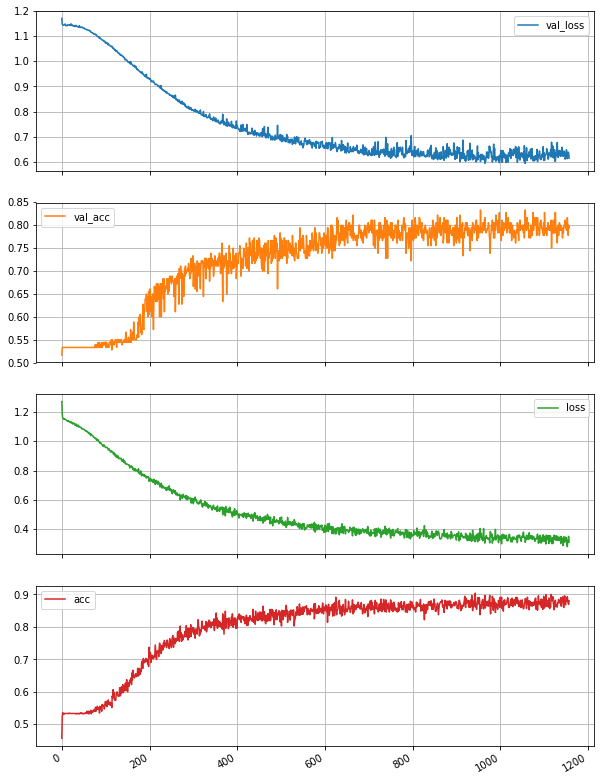

In [176]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [177]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "other"
    elif encodedLabel == 1:
        return "fizz"
    elif encodedLabel == 2:
        return "buzz"
    elif encodedLabel == 3:
        return "fizzbuzz"

In [178]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

output = {}
output["input"] = testData['input']
output["label"] = testData['label']
output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 12  Correct :88
Testing Accuracy: 88.0
